# .

In [1]:
import random
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
def pi(arr):
    if len(arr)==1:
        return arr[0]
    else:
        a=arr[-1]
        result=a*pi(arr[:-1])
        return result

In [5]:
xseq1=[0.5,0.5,1,1.5,1.8,2,2,2,2,2]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
xseq2=[0.5,0.5,1,1.5,1.8,2,2,2,2,2]; # pi(xseq)=20 에서 너무 벗어나지 않도록 임의로 설정
x1history1=[]; # x1 sampling history of way1
x1history2=[]; # x1 sampling history of way2
pixhistory1=[]; # pix sampling history of way1
pixhistory2=[]; #pix sampling history of way2

In [6]:
#way 1
for i in range(10000):
    for j in range(10):
        xjcandidate=random.expovariate(1); #xj 를 exp 에서 후보 뽑기
        xseqcandidate=xseq1; #x(j-1) 까지 업데이트 되었던 xseq 가져오기
        xseqcandidate[j]= xjcandidate; #[x1,x2,,,,xj,,,,x10] 후보 새롭게 구성
        if pi(xseqcandidate)>20: #새롭게 구성한 [x1,x2,,,,xj,,,,x10] pi 값 확인
            xseq1=xseqcandidate; #20이 넘는다면 후보를 accept
        else:
            while pi(xseqcandidate)<=20: #pi 가 20이 안 넘으면 넘을때까지...
                xjcandidate= random.expovariate(1);
                xseqcandidate[j]=xjcandidate;
            xseq1=xseqcandidate; #넘었으니 accept
    x1history1.append(xseq1[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory1.append(pi(xseq1)); #pi x sampling 모으기

In [7]:
#way 2
for k in range(10000):
    for l in range(10):
        xother=xseq2[:l]+xseq2[l+1:];
        piother=pi(xseq2); #xl 빼고 나머지 값들의 곱
        minimum=20/piother; #xl 이 가질수 있는 최솟값
        xseq2[l]=st.expon.rvs(minimum) # st.expon.rvs(a) = random sampling of f(x)=exp(-(x-a)), x>=a
    x1history2.append(xseq2[0]); #x1~x10 까지 전부 업데이트한 xseq 을 sampling 으로 accept, 그중 x1 sampling 모으기
    pixhistory2.append(pi(xseq2)); #pi x sampling 모으기

In [8]:
x1history1=x1history1[:9500];
pixhistory1=pixhistory1[:9500];
x1history2=x1history2[:9500];
pixhistory2=pixhistory2[:9500];

In [9]:
xaxis=[];
for k in range(9500):
    xaxis.append(k+1)

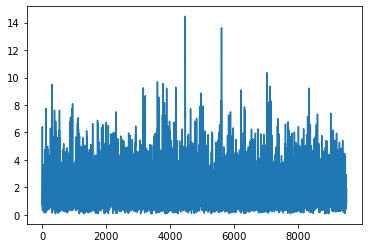

In [10]:
plt.plot(xaxis,x1history1);

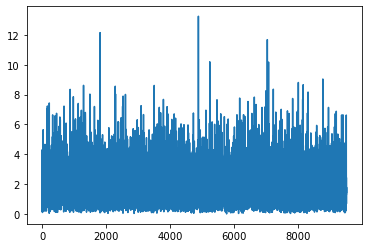

In [11]:
plt.plot(xaxis,x1history2);

1.920942158378159


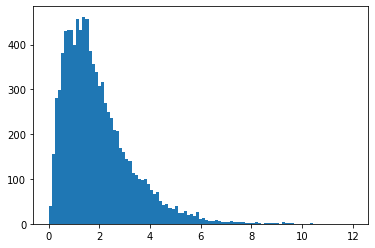

In [12]:
mean1=sum(x1history1)/len(x1history1)
print(mean1)
xaxis=np.linspace(0,12,100)
plt.hist(x1history1, bins=xaxis);

1.864619858308821


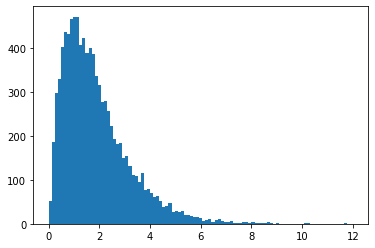

In [13]:
mean2=sum(x1history2)/len(x1history2)
print(mean2)
plt.hist(x1history2, bins=xaxis);

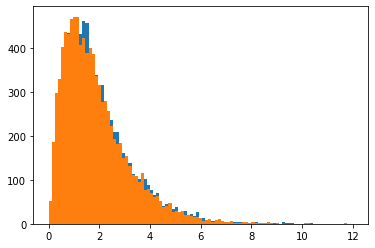

In [14]:
plt.hist(x1history1, bins=xaxis);
plt.hist(x1history2, bins=xaxis);

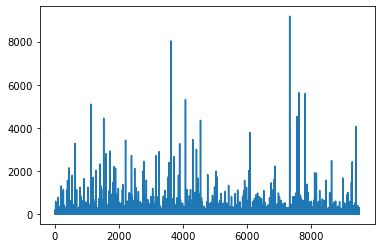

In [15]:
plt.plot(pixhistory1);

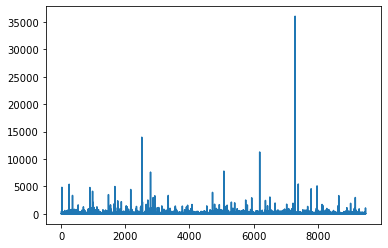

In [16]:
plt.plot(pixhistory2);

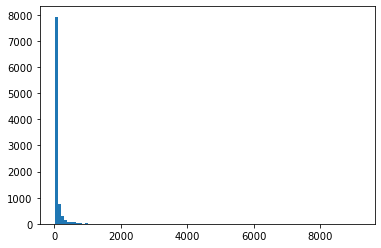

In [17]:
plt.hist(pixhistory1, bins=100);

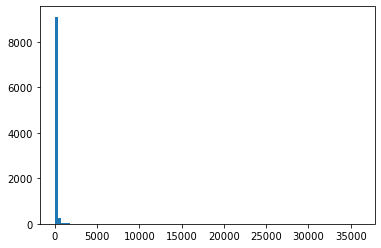

In [18]:
plt.hist(pixhistory2, bins=100);

# .

## Gibbs sampling

pros

- We can sample directly from a less complex conditional distribution.
- Conditional dist. may have lower dimesion than joint dist..

cons
- Posterioir를 찾을 수 있어야만 쓸 수 있음
- 변수들간의 correlation에 영향을 받음

## Metropolis-Hastings sampler

pros
- conditional dist. 결정할 필요 없음.
- 고차원 dist. 혹은 correlation이 높은 dist.에서도 괜찮은 성능.

cons
- 수렴하는 속도 느림.
- Step size에 영향을 많이 받음.

## Metropolis-Hastings sampler

pros
- 상대적으로 쉽게 sample generate 가능

cons
- Envelope function을 어떻게 정하는지에 따라 rejection에 영향을 많이 받음
- High dimension에서 다른 알고리즘보다 좋은 성능을 내지만 수렴 속도가 느림.
- Sample들이 correlated 되어 있다.

## No U-turn sampler

- HMC가 desired number of steps parameter L ($\epsilon$은 step size parameter) 에 의존하는 것을 없애주면서 여전히 HMC처럼 독립적인 sample들을 효율적으로 만들어냄

References
- https://medium.com/nerd-for-tech/metropolis-hastings-review-2dfeb0c3d0eb
- https://www.aptech.com/blog/fundamental-bayesian-samplers/
- 24기 김동휘 과제

# .

In [19]:
import numpy as np
from scipy.stats import uniform, expon, gaussian_kde
import matplotlib.pyplot as plt

In [ ]:
def circlePlot(n):
    x = uniform.rvs(loc = -1, scale = 2, size=n)
    y = uniform.rvs(loc = -1, scale = 2, size=n)
    Acc = []
    Rej = []
    
    for i in range(n):
        if x[i]**2 + y[i]**2 < 1:
            Acc.append((x[i],y[i]))
        else:
            Rej.append((x[i],y[i]))
    
    figure, axes = plt.subplots(1,1,figsize=(12,12))
    plt.scatter([x[0] for x in Acc], [x[1] for x in Acc],s = 2, color = 'green')
    plt.scatter([x[0] for x in Rej], [x[1] for x in Rej],s = 2, color = 'red')
    c = plt.Circle((0,0),1,fill=False)
    axes.add_artist(c)
    
    pi = 4 * len(Acc) / n
    print('pi =', pi)

In [26]:
def Pi(n):
    x = uniform.rvs(loc=-1, scale =2, size = n)
    y = uniform.rvs(loc =-1, scale=2, size = n)
    accepted = []
    rejected = []

    for i in range(n):
        if x[i]**2 + y[i]**2 <1 :
            accepted.append((x[i], y[i]))
        else:
            rejected.append((x[i], y[i]))

    fig, axis = plt.subplots(1,1, figsize=(15,15))     
    plt.scatter([x[0] for x in accepted], [x[1] for x in accepted], color = 'green')
    plt.scatter([x[0] for x in rejected], [x[1] for x in rejected],color = 'red')
    c = plt.Circle((0,0),1,fill=False)
    axis.add_artist(c)
  
    pi = 4 * len (accepted) / n

    plt.show()
    print('pi = ', pi)

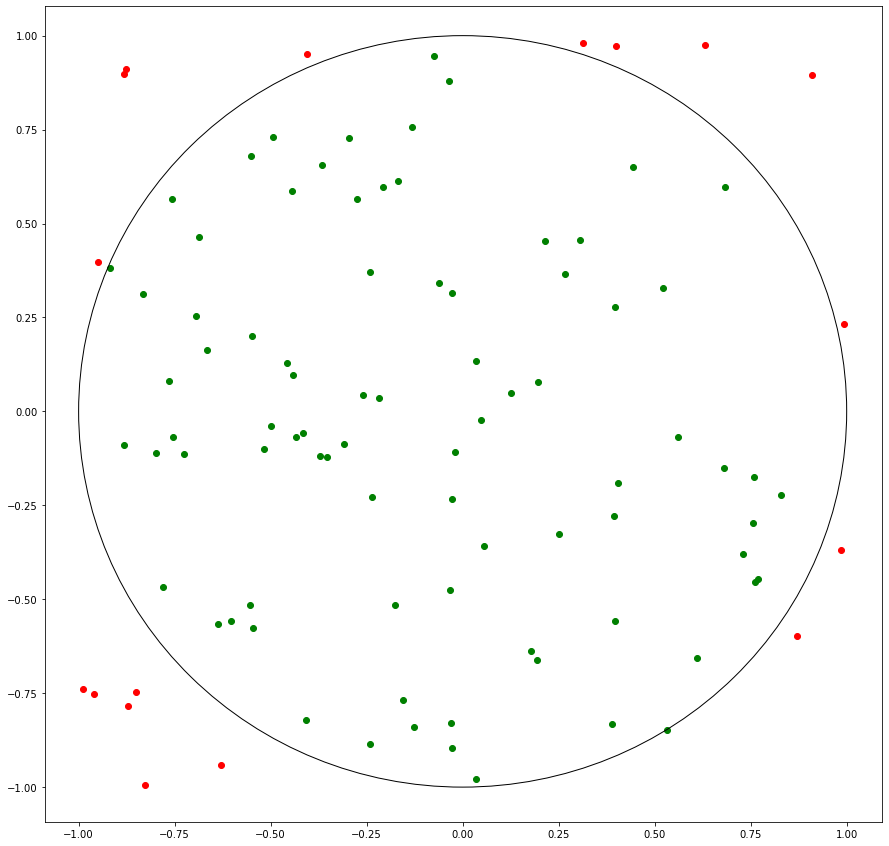

pi =  3.32


In [27]:
Pi(100)

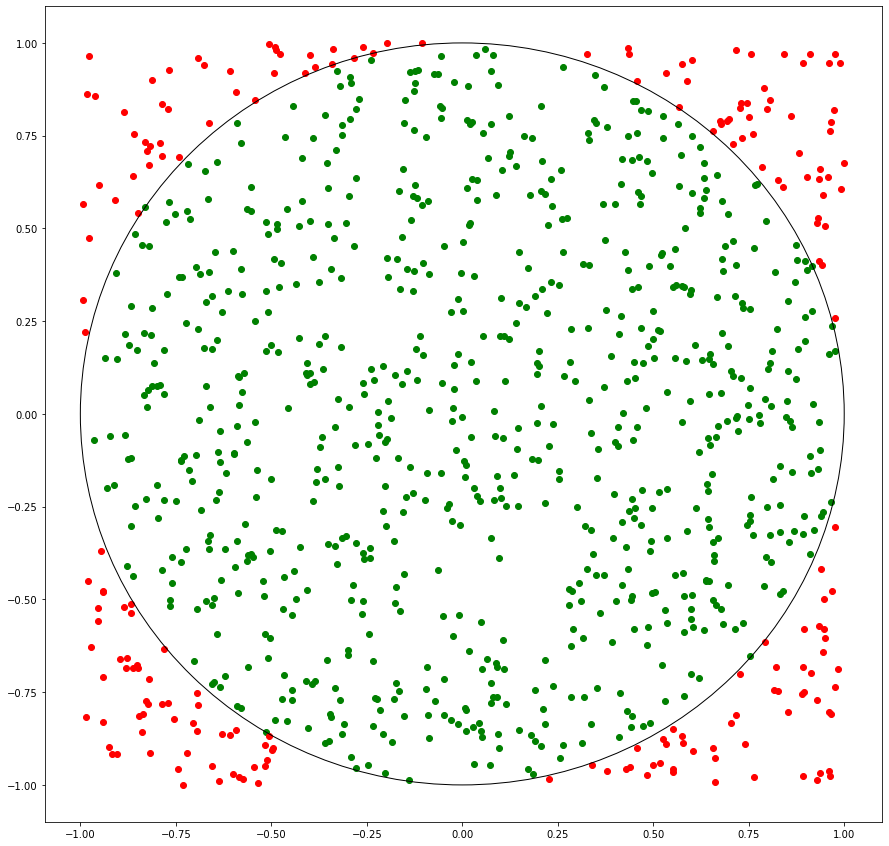

pi =  3.172


In [28]:
Pi(1000)

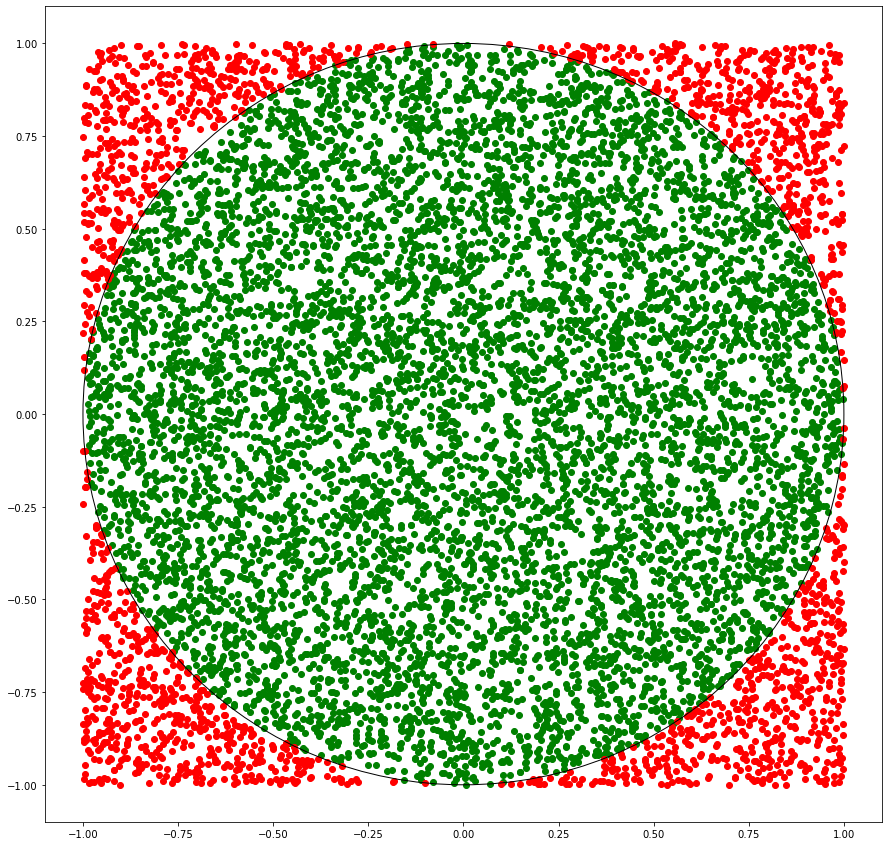

pi =  3.1576


In [29]:
Pi(10000)

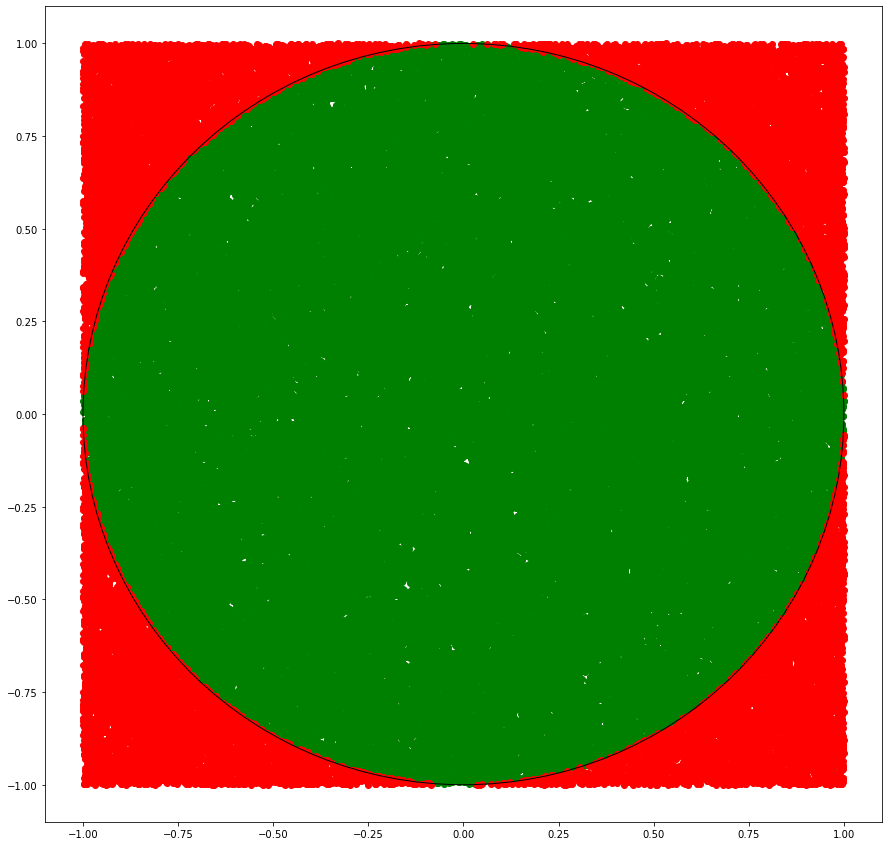

pi =  3.14216


In [30]:
Pi(100000)

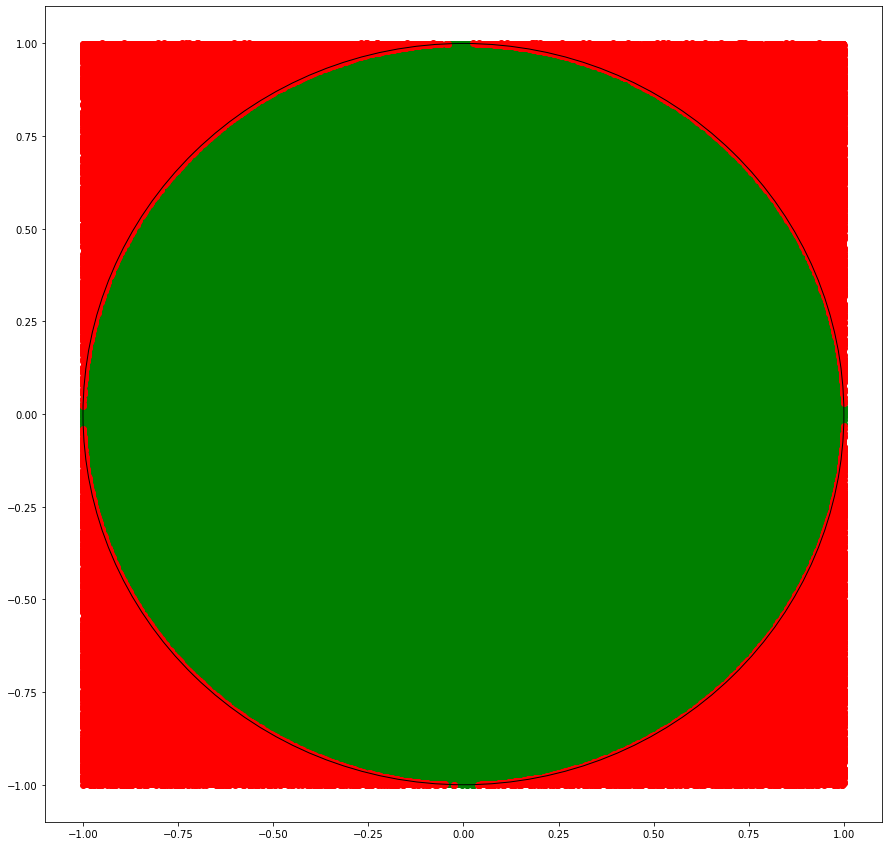

pi =  3.139656


In [32]:
Pi(1000000)